In [2]:
#爬取微博热搜，并进行数据清洗和本地化存储
import requests
from lxml import etree
import pickle
if __name__ == "__main__":
    url = "https://s.weibo.com/top/summary"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0"
    }
    page = requests.get(url, headers).text
    tree = etree.HTML(page)
    hotSearch_list = tree.xpath('//tbody/tr')
    del hotSearch_list[0]
    hotSearch_all_data = []
    for hotSearch in hotSearch_list:
        rank = hotSearch.xpath('./td[@class="td-01 ranktop"]/text()')[0]
        title = hotSearch.xpath('./td[@class="td-02"]/a/text()')[0]
        hot_degree = hotSearch.xpath('./td[@class="td-02"]/span/text()')[0]
        hotSearch_data = [rank, title, hot_degree]
        hotSearch_all_data.append(hotSearch_data)
    with open('./微博热搜.pkl', 'wb') as f:
        pickle.dump(hotSearch_all_data, f)
    print("数据保存成功！")

数据保存成功！


In [3]:
#加载本地数据进行可视化展示
import pickle
import pandas as pd
f = open('./微博热搜.pkl', 'rb')
data = pickle.load(f)
nu = []
for i in range(50):
    nu.append('')
frame = pd.DataFrame(data, index=nu, columns=["排名", "关键词", "热度"])
frame

,排名,关键词,热度
,1,河北新增51例本土确诊,4177803
,2,应届生拒绝996被申通快递辞退,3155817
,3,黄龄 浴室钓鱼,2314746
,4,李菲儿微博评论,2154541
,5,许嵩方回应被抄袭,1820601
,6,杨颖工作室声明,1464373
,7,特朗普支持者闯入美国国会,1253424
,8,全国多地倡议就地过年,1036812
,9,特朗普称绝不会承认败选,1031039
,10,河北疫情,1018517


In [4]:
# 取出数据中的标题进行关键词提取
from ltp import LTP
import pickle
f = open('./微博热搜.pkl', 'rb')
data = pickle.load(f)
all_title = []
for i in data:
    all_title.append(i[1])
ltp = LTP()
cut_word = []
cut_word_type=[]
for t in all_title:
    seg, hidden = ltp.seg([t])
    ner = ltp.ner(hidden)
    if len(ner[0])==0:
        continue
    for ner_t in ner[0]:
        tag, start, end = ner_t
        cut_word.append("".join(seg[0][start:end + 1]))
        cut_word_type.append(tag)
    with open('./分词结果1.pkl', 'wb') as f:
        pickle.dump(cut_word, f)

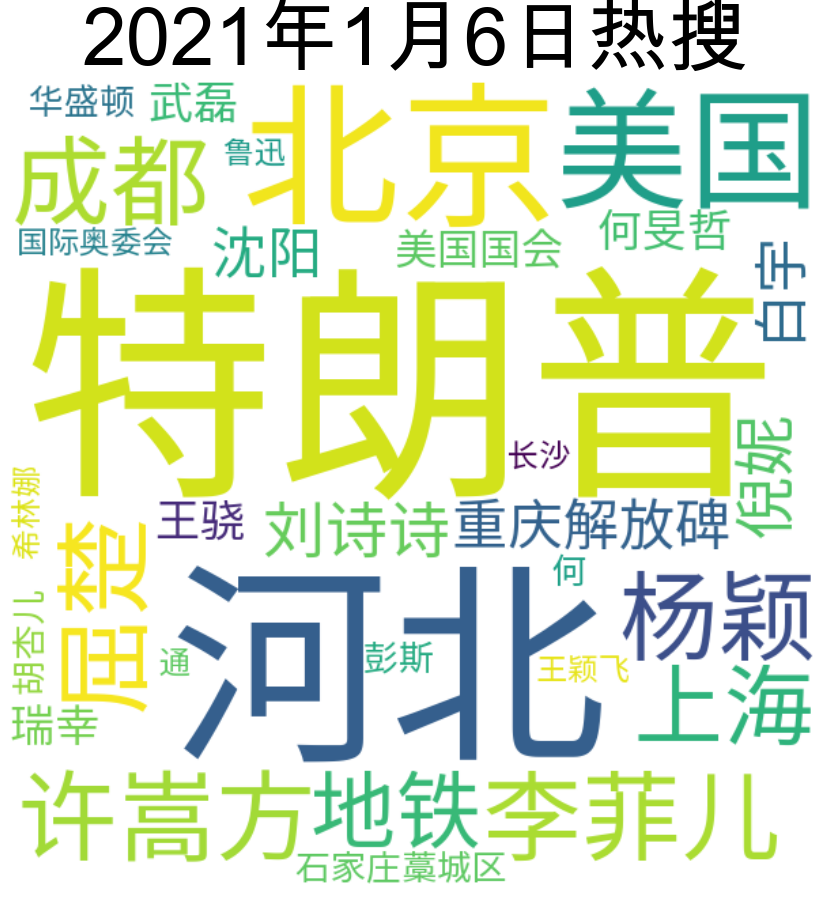

In [5]:
# 对分词结果进行展示
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
import pickle
f = open('./分词结果1.pkl', 'rb')
data = pickle.load(f)
text_string=''
for i in data:
    text_string = text_string+ i +' '
font = "./PingFang.ttc"
wordcloud = WordCloud(font_path=font,width=600,height=600,background_color='white',).generate(text_string)
# wordcloud.to_file('./images/2020.png')
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
myfontdict = {'fontsize':80}
plt.title('2021年1月6日热搜',fontdict = myfontdict)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

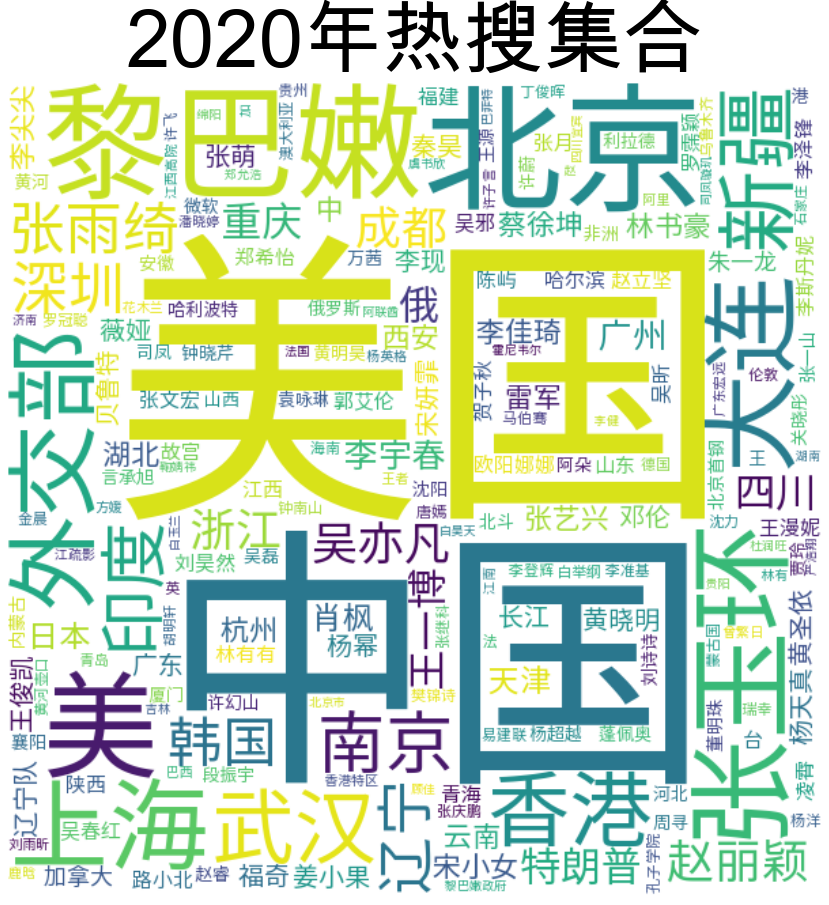

In [6]:
import requests
from lxml import etree
from ltp import LTP
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
if __name__ == "__main__":
    url = "https://www.cnblogs.com/sonder/p/13496173.html"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0"
    }
    page = requests.get(url, headers).text
    tree = etree.HTML(page)
    hotSearch_all_data = tree.xpath('//div[@id="cnblogs_post_body"]/p[5]//text()')

    ltp = LTP()
    cut_word = []
    for t in hotSearch_all_data:
        seg, hidden = ltp.seg([t])
        ner = ltp.ner(hidden)
        if len(ner[0])==0:
            continue
        for ner_t in ner[0]:
            tag, start, end = ner_t
            cut_word.append("".join(seg[0][start:end + 1]))
    text_string=''
    for i in cut_word:
        text_string = text_string+ i +' '
    font = "./PingFang.ttc"
    wordcloud = WordCloud(font_path=font,width=600,height=600,background_color='white',).generate(text_string)
    # wordcloud.to_file('./images/2020.png')
    plt.figure(figsize=(15, 15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    myfontdict = {'fontsize':80}
    plt.title('2020年热搜集合',fontdict = myfontdict)
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']